<a href="https://colab.research.google.com/github/Danie8904/RFM-/blob/main/RFM_Ecommerce_Clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bienvenidos a mi primer Cuaderno (Notebook) en Jupyter - Python**
## Analítica para Mercadeo
## Especialización en Analítica en Big Data
### Practica: Segmentación clientes - RFM

# **Paso 1. DataSet**

RFM analysis is a powerful technique used by companies to better understand customer behaviour and optimize engagement strategies. It revolves around three key dimensions: recency, frequency, and monetary value. These dimensions capture essential aspects of customer transactions, providing valuable information for segmentation and personalized marketing campaigns.

The given dataset is provided by an e-commerce platform containing customer transaction data including customer ID, purchase date, transaction amount, product information, ID command and location. The platform aims to leverage RFM (recency, frequency, monetary value) analysis to segment customers and optimize customer engagement strategies.

# **Paso 2. Importar Librerias**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

# **Paso 3. Cargar Datos**

*   https://www.kaggle.com/
*   Cargar Datos en entorno Google Colab


In [ ]:
import kagglehub

# Descargar la última versión

path = kagglehub.dataset_download("harshsingh2209/rfm-analysis")

# Fuente de datos : https://www.kaggle.com/code/danysharipov/rfm-ecommerce-notebook

print("Path to dataset files:", path)
data = pd.read_csv(path + '/rfm_data.csv')

Path to dataset files: /kaggle/input/rfm-analysis


# **Paso 3. Revisón de Datos**



*   Tamaño
*   Variable
* Formatos Variables
* Revisón Datos Faltantes
* Valores Unicos
* Otros


In [ ]:
data.head(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [ ]:
data.tail(5)

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
995,2970,2023-06-10,759.62,Product B,275284,London
996,6669,2023-06-10,941.50,Product C,987025,New York
997,8836,2023-06-10,545.36,Product C,512842,London
998,1440,2023-06-10,729.94,Product B,559753,Paris
999,4759,2023-06-10,804.28,Product D,467544,New York


In [ ]:
len(data)

1000

In [ ]:
data.info()

NameError: name 'data' is not defined

In [ ]:
data.isnull().sum()

,0
CustomerID,0
PurchaseDate,0
TransactionAmount,0
ProductInformation,0
OrderID,0
Location,0


In [ ]:
data.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [ ]:
def frame_check(frame):
    print('#Shape')
    print(frame.shape)
    print('\n #Info:')
    print(frame.info())
    print('\n #Column names')
    print(frame.columns)
    print('\n #Null values:')
    print(frame.isna().sum())
    print('\n #Describe:')
    print(frame.describe(include = 'all'))
    print('\n #Unique values:')
    print(frame.nunique())

In [ ]:
frame_check(data)

#Shape
(1000, 6)

 #Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB
None

 #Column names
Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location'],
      dtype='object')

 #Null values:
CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

 #Describe:
         CustomerID PurchaseDate  TransactionAmount ProductInformation  \


In [ ]:
# Ajuste de Variable Fecha (cambiar formato)
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

In [ ]:
print(f"Max date is {data['PurchaseDate'].max()}")
print(f"Min date is {data['PurchaseDate'].min()}")

Max date is 2023-06-10 00:00:00
Min date is 2023-04-11 00:00:00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 47.0+ KB


# **Paso 4. RFM Calculo de Calificaciones**

In [ ]:
# Tabla ordenada por clientes, # de ordenes, última compra y suma valor monetario
rfm_df = data.groupby('CustomerID').agg({'CustomerID': 'count',
                                 'PurchaseDate': 'max',
                                 'TransactionAmount': 'sum'}).rename(columns = {'PurchaseDate': 'recency_date',
                                                                                         'CustomerID': 'frequency',
                                                                                         'TransactionAmount': 'monetary_value'})
rfm_df.sort_values(by='frequency', ascending=False).head(5)

,frequency,recency_date,monetary_value
CustomerID,,,
5557,3,2023-06-01,2379.45
7363,3,2023-05-03,1386.32
4804,3,2023-05-15,2073.33
1645,2,2023-05-16,1292.11
5254,2,2023-05-14,1132.47


In [ ]:
# Calculo recencia puede ser calculo desde una ventana de tiempo objetivo, para este caso: Julio 01 2023
rfm_df['recency'] = rfm_df['recency_date'].apply(lambda x: (pd.to_datetime('2023-07-01') - x).days)
rfm_df.sort_values(by='frequency', ascending=False).head(10)

,frequency,recency_date,monetary_value,recency
CustomerID,,,,
5557,3,2023-06-01,2379.45,30
7363,3,2023-05-03,1386.32,59
4804,3,2023-05-15,2073.33,47
1645,2,2023-05-16,1292.11,46
5254,2,2023-05-14,1132.47,48
1601,2,2023-05-10,952.47,52
9564,2,2023-06-05,945.27,26
2133,2,2023-06-02,1386.69,29
4812,2,2023-05-26,1279.44,36


In [ ]:
rfm_df = rfm_df.drop(['recency_date'], axis = 1)

In [ ]:
rfm_df.sort_values(by='frequency', ascending=False).head(10)

,frequency,monetary_value,recency
CustomerID,,,
5557,3,2379.45,30
7363,3,1386.32,59
4804,3,2073.33,47
1645,2,1292.11,46
5254,2,1132.47,48
1601,2,952.47,52
9564,2,945.27,26
2133,2,1386.69,29
4812,2,1279.44,36


In [ ]:
quintiles = rfm_df.quantile([0.2, 0.4, 0.6, 0.8])
quintiles

,frequency,monetary_value,recency
0.2,1.0,218.64,33.0
0.4,1.0,440.15,45.0
0.6,1.0,644.07,58.0
0.8,1.0,821.22,68.0


In [ ]:
#functions arguments:
#val -value
#q - quantiles frame
#s - score argument - recency, monetary_value, frequency

def RScore(val, s, q):
    if val <= q[s][0.2]:
        return 5
    elif val <= q[s][0.4]:
        return 4
    elif val <= q[s][0.6]:
        return 3
    elif val <= q[s][0.8]:
        return 2
    else:
        return 1


def FMScore(val, s, q):
    if val <= q[s][0.2]:
        return 1
    elif val <= q[s][0.4]:
        return 2
    elif val <= q[s][0.6]:
        return 3
    elif val <= q[s][0.8]:
        return 4
    else:
        return 5

In [ ]:
rfm_df['r_score'] = rfm_df['recency'].apply(RScore, args = ('recency', quintiles))
rfm_df['f_score'] = rfm_df['frequency'].apply(FMScore, args = ('frequency', quintiles))
rfm_df['m_score'] = rfm_df['monetary_value'].apply(FMScore, args = ('monetary_value', quintiles))

In [ ]:
rfm_df = rfm_df.reset_index()
rfm_df

,CustomerID,frequency,monetary_value,recency,r_score,f_score,m_score
0,1011,2,1129.02,54,3,5,5
1,1025,1,359.29,42,4,1,2
2,1029,1,704.99,21,5,1,4
3,1046,1,859.82,64,2,1,5
4,1049,1,225.72,34,4,1,2
...,...,...,...,...,...,...,...
941,9941,1,960.53,63,2,1,5
942,9950,1,679.11,59,2,1,4
943,9954,1,798.01,33,5,1,4
944,9985,1,36.10,78,1,1,1


In [ ]:
#calculating mean score
rfm_df['mean_score'] = rfm_df[['r_score', 'f_score', 'm_score']].mean(axis = 1)

In [ ]:
#calculating total score
rfm_df['total_score'] = rfm_df['r_score'] + rfm_df['f_score'] + rfm_df['m_score']

In [ ]:
rfm_df

,CustomerID,frequency,monetary_value,recency,r_score,f_score,m_score,mean_score,total_score
0,1011,2,1129.02,54,3,5,5,4.333333,13
1,1025,1,359.29,42,4,1,2,2.333333,7
2,1029,1,704.99,21,5,1,4,3.333333,10
3,1046,1,859.82,64,2,1,5,2.666667,8
4,1049,1,225.72,34,4,1,2,2.333333,7
...,...,...,...,...,...,...,...,...,...
941,9941,1,960.53,63,2,1,5,2.666667,8
942,9950,1,679.11,59,2,1,4,2.333333,7
943,9954,1,798.01,33,5,1,4,3.333333,10
944,9985,1,36.10,78,1,1,1,1.000000,3


# **Paso 5. Analisis y visualización**

['Tokyo' 'London' 'New York' 'Paris']


<Axes: xlabel='Location', ylabel='count'>

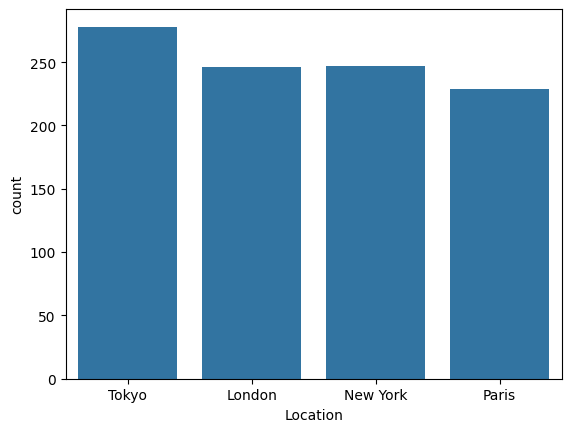

In [ ]:
unique_values=data['Location'].unique()
print(unique_values)
sns.countplot(data=data,x="Location")

<Axes: xlabel='Location'>

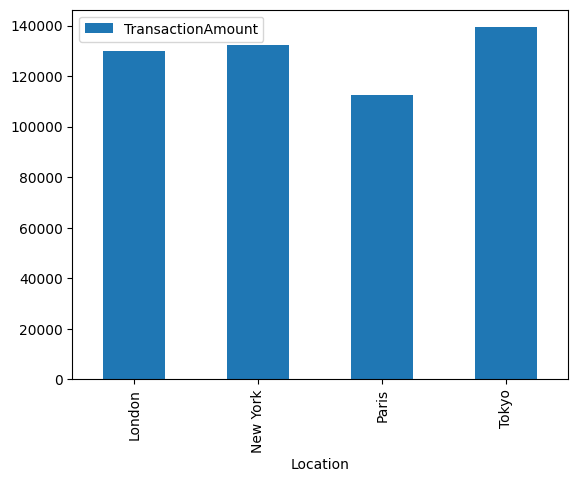

In [ ]:
location_df=data[['Location','TransactionAmount']]
location_df.groupby("Location").sum().plot(kind="bar")

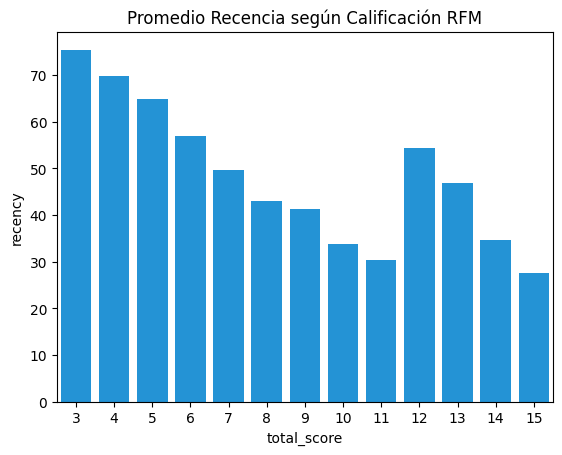

In [ ]:
sns.barplot(rfm_df.groupby('total_score')['recency'].mean().reset_index(),
            x = 'total_score', y = 'recency', color = '#069AF3').set_title('Promedio Recencia según Calificación RFM');

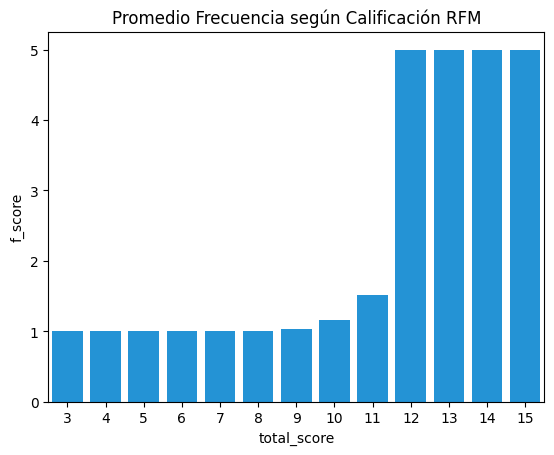

In [ ]:
sns.barplot(rfm_df.groupby('total_score')['f_score'].mean().reset_index(),
            x = 'total_score', y = 'f_score', color = '#069AF3').set_title('Promedio Frecuencia según Calificación RFM');

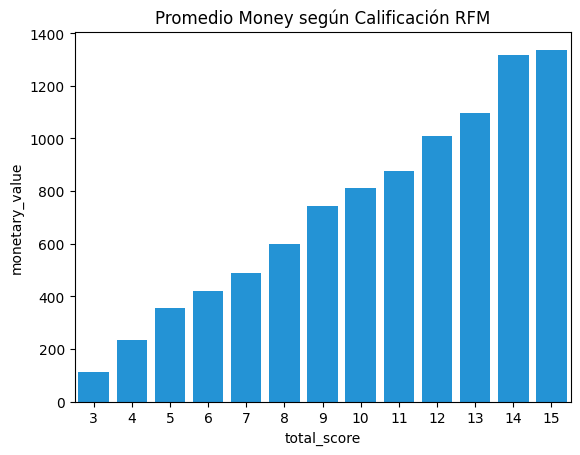

In [ ]:
sns.barplot(rfm_df.groupby('total_score')['monetary_value'].mean().reset_index(),
            x = 'total_score', y = 'monetary_value', color = '#069AF3').set_title('Promedio Money según Calificación RFM');

<ipython-input-31-a32cf5eda30d>:1: FutureWarning: The provided callable <function mean at 0x78bba8769440> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sns.heatmap(pd.pivot_table(rfm_df, values = 'monetary_value', index = ['m_score'], columns = ['r_score'], aggfunc = np.mean),


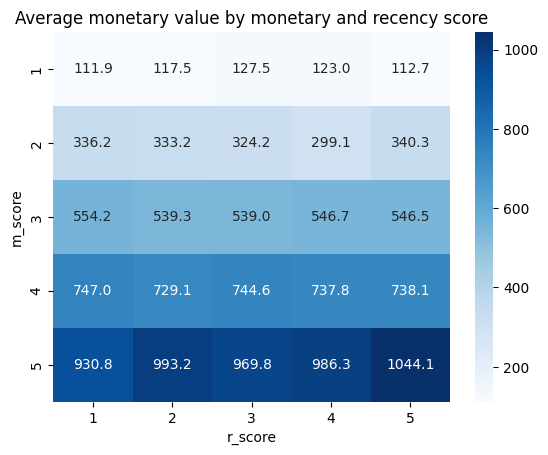

In [ ]:
sns.heatmap(pd.pivot_table(rfm_df, values = 'monetary_value', index = ['m_score'], columns = ['r_score'], aggfunc = np.mean),
           annot = True, cmap = 'Blues', fmt = '.1f').set_title('Average monetary value by monetary and recency score');

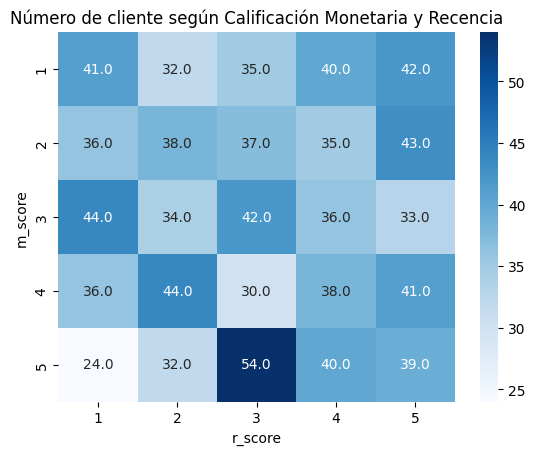

In [ ]:
sns.heatmap(pd.pivot_table(rfm_df.reset_index(), values = 'CustomerID',
               index = ['m_score'], columns = ['r_score'], aggfunc = np.count_nonzero),
           annot = True, cmap = 'Blues', fmt = '.1f').set_title('Número de cliente según Calificación Monetaria y Recencia');

In [ ]:
#Top 30 Clientes más altos en recencia y frencuencua
rfm_df.sort_values(['f_score', 'r_score'], ascending = [False, False]).head(30)

,CustomerID,frequency,monetary_value,recency,r_score,f_score,m_score,mean_score,total_score
27,1305,2,1234.46,25,5,5,5,5.000000,15
39,1480,2,1621.62,24,5,5,5,5.000000,15
74,1803,2,1033.13,23,5,5,5,5.000000,15
113,2133,2,1386.69,29,5,5,5,5.000000,15
233,3262,2,1080.46,27,5,5,5,5.000000,15
244,3399,2,123.06,28,5,5,1,3.666667,11
387,4788,2,714.16,31,5,5,4,4.666667,14
422,5067,2,1005.37,26,5,5,5,5.000000,15
472,5557,3,2379.45,30,5,5,5,5.000000,15
630,7046,2,1662.10,31,5,5,5,5.000000,15


# **Paso 6. Mejoras de analisisis de datos**



1.   Categorizar en clientes Campeones, clientes nuevos, leales, promotores, dormidos, etc
2. Mejorar los ejes nombres (x, y)
2.   Calificar recencia, frecuencia y monetario según negocio
3. Unificar con variables producto y región
4. Validar con el negocio la segmentación
5. Probar con otros métodos si hay semejanza
6. Diseñar estrategias comerciales y de mercadeo según perfiles generados
7. Medición de resultados




# **Ejercicio**



*   Categorizar clientes de categorias
    

1.   Límites: 3-5, 6-8, 9-11, 12-15
2.   Categorias: 'Bronce', 'Plata', 'Oro', 'Platino'

*   Hacer gráficas adicionales e interpretar



In [ ]:
def categorizar_cliente(score):
    if 3 <= score <= 5:
        return 'Bronce'
    elif 6 <= score <= 8:
        return 'Plata'
    elif 9 <= score <= 11:
        return 'Oro'
    elif 12 <= score <= 15:
        return 'Platino'
    else:
        return 'Sin categoría'

rfm_df['categoria_cliente'] = rfm_df['total_score'].apply(categorizar_cliente)

In [ ]:
rfm_df

,CustomerID,frequency,monetary_value,recency,r_score,f_score,m_score,mean_score,total_score,categoria_cliente
0,1011,2,1129.02,54,3,5,5,4.333333,13,Platino
1,1025,1,359.29,42,4,1,2,2.333333,7,Plata
2,1029,1,704.99,21,5,1,4,3.333333,10,Oro
3,1046,1,859.82,64,2,1,5,2.666667,8,Plata
4,1049,1,225.72,34,4,1,2,2.333333,7,Plata
...,...,...,...,...,...,...,...,...,...,...
941,9941,1,960.53,63,2,1,5,2.666667,8,Plata
942,9950,1,679.11,59,2,1,4,2.333333,7,Plata
943,9954,1,798.01,33,5,1,4,3.333333,10,Oro
944,9985,1,36.10,78,1,1,1,1.000000,3,Bronce


['Platino' 'Plata' 'Oro' 'Bronce']


<Axes: xlabel='categoria_cliente', ylabel='count'>

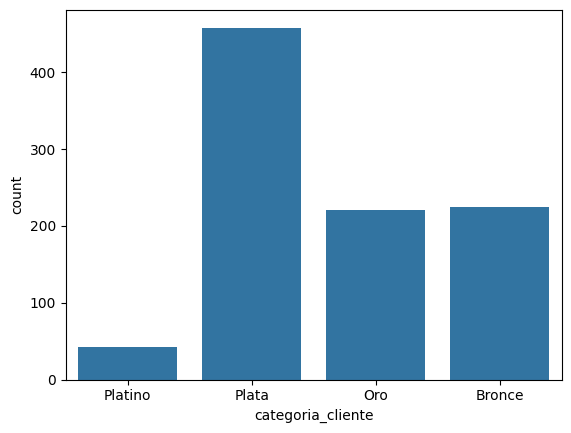

In [ ]:
unique_values=rfm_df['categoria_cliente'].unique()
print(unique_values)
sns.countplot(data=rfm_df,x="categoria_cliente")

In [ ]:
rfm_df['category'] = pd.cut(
    rfm_df['total_score'],
    bins=[2, 5, 8, 11, 15],
    labels=['Bronce', 'Plata', 'Oro', 'Platino']
)


print(rfm_df[['total_score', 'category']].sample(10))

     total_score category
92             4   Bronce
22             6    Plata
383           10      Oro
108            7    Plata
46             7    Plata
293            7    Plata
537            5   Bronce
536            6    Plata
558           10      Oro
287            5   Bronce


In [ ]:
bins = [3, 6, 9, 12, 15]  # Límites: 3-5, 6-8, 9-11, 12-15
labels = ['Bronce', 'Plata', 'Oro', 'Platino']  # Nombres de los segmentos

# Crear la columna de segmentación
rfm_df['segmento_1'] = pd.cut(
    rfm_df['total_score'],
    bins=bins,
    labels=labels,
    include_lowest=True  # Incluye el valor mínimo (3)
)
rfm_df

,CustomerID,frequency,monetary_value,recency,r_score,f_score,m_score,mean_score,total_score,categoria_cliente,category,segmento_1
0,1011,2,1129.02,54,3,5,5,4.333333,13,Platino,Platino,Platino
1,1025,1,359.29,42,4,1,2,2.333333,7,Plata,Plata,Plata
2,1029,1,704.99,21,5,1,4,3.333333,10,Oro,Oro,Oro
3,1046,1,859.82,64,2,1,5,2.666667,8,Plata,Plata,Plata
4,1049,1,225.72,34,4,1,2,2.333333,7,Plata,Plata,Plata
...,...,...,...,...,...,...,...,...,...,...,...,...
941,9941,1,960.53,63,2,1,5,2.666667,8,Plata,Plata,Plata
942,9950,1,679.11,59,2,1,4,2.333333,7,Plata,Plata,Plata
943,9954,1,798.01,33,5,1,4,3.333333,10,Oro,Oro,Oro
944,9985,1,36.10,78,1,1,1,1.000000,3,Bronce,Bronce,Bronce


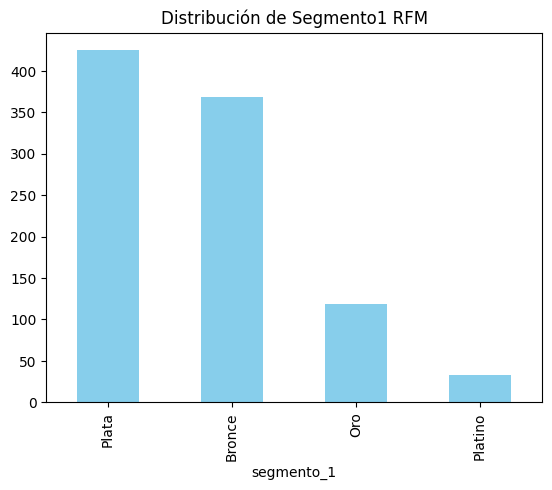

In [ ]:
rfm_df['segmento_1'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Segmento1 RFM')
plt.show()

In [ ]:
condiciones = [(rfm_df.r_score >= 4) & (rfm_df.f_score >= 4) & (rfm_df.m_score >= 4),
               (rfm_df.r_score <=3) & (rfm_df.f_score<=3) & (rfm_df.m_score <=3),
               (rfm_df.r_score <=5) & (rfm_df.f_score<=5) & (rfm_df.m_score ==5),
               (rfm_df.r_score <=5) & (rfm_df.f_score>=4) & (rfm_df.m_score <=5),
               (rfm_df.r_score >=4) & (rfm_df.f_score<=5) & (rfm_df.m_score <=5)]

elecciones = np.array(("Potenciales","Perdidos", "Derrochadores","Leales","Nuevos"), dtype="object")

In [ ]:
rfm_df["Segmento2"] = np.select(condiciones, elecciones, "Perdidos")

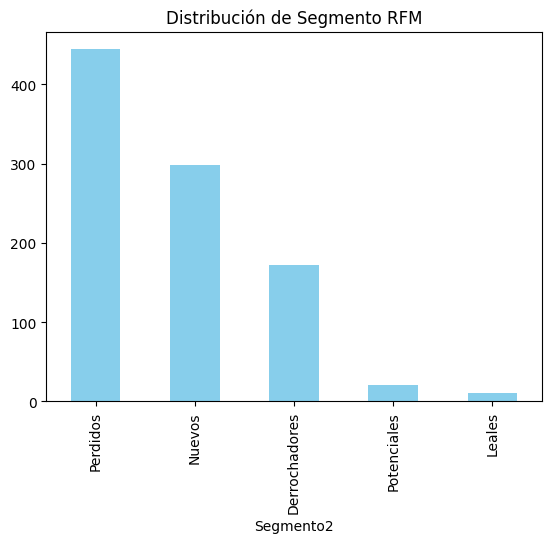

In [ ]:
rfm_df['Segmento2'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Segmento RFM')
plt.show()

<Axes: xlabel='Segmento2', ylabel='recency'>

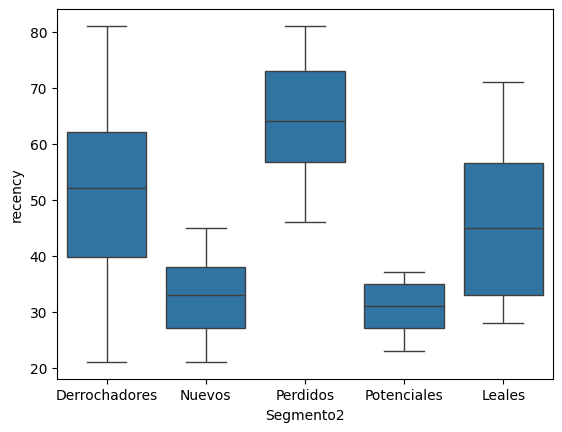

In [ ]:
sns.boxplot(data=rfm_df, x='Segmento2', y='recency')

<Axes: xlabel='Segmento2', ylabel='monetary_value'>

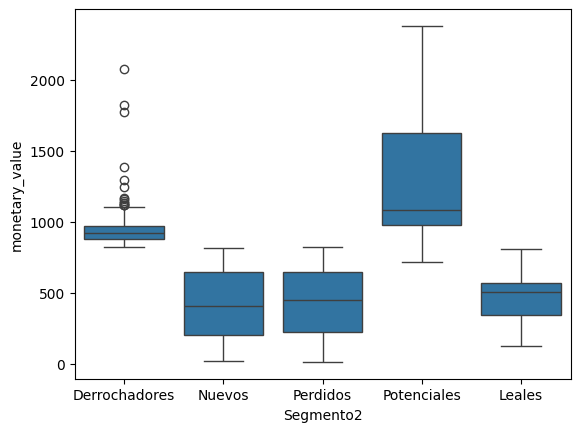

In [ ]:
sns.boxplot(data=rfm_df, x='Segmento2', y='monetary_value')

<Axes: xlabel='Segmento2', ylabel='frequency'>

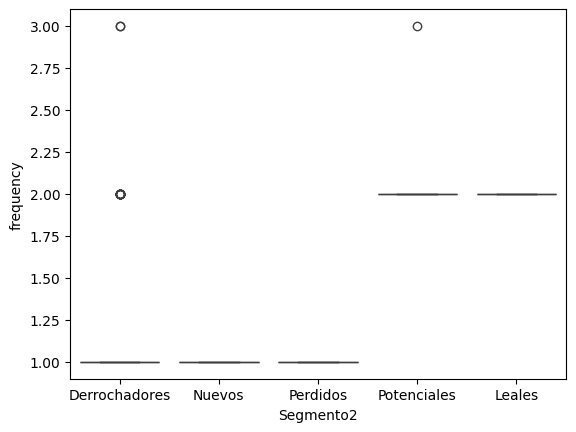

In [ ]:
sns.boxplot(data=rfm_df, x='Segmento2', y='frequency')